In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [5]:
users = pd.read_csv('./3_user_data.csv')
logs = pd.read_csv('./3_logs.csv')

In [6]:
users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [10]:
logs.platform.nunique()

3

In [21]:
ms = logs.query('success == True').groupby('client',as_index=False).agg({'success': 'count'}).sort_values('success',ascending=False).head(10)

In [26]:
ms.query('success == 41').sort_values('client', ascending=True)

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [27]:
logs.query('success == True').groupby('platform').agg({'success':'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


In [29]:
logs['premium'] = users['premium']

In [30]:
logs.head()

,client,success,platform,time,premium
0,40177,True,phone,1585412212,False
1,61468,True,phone,1585425658,False
2,35604,False,phone,1585459894,False
3,9961,True,phone,1585400189,False
4,10931,True,computer,1585468629,False


In [31]:
logs.query('premium == True').groupby('platform').agg({'client': 'count'})

,client
platform,
computer,139
phone,247
tablet,20


In [32]:
logs['age'] = users['age']

In [53]:
agge_p = logs.query('premium == True').groupby(['premium', 'age'],as_index=False).agg({'client':'count'})

In [54]:
agge_np = logs.query('premium == False').groupby(['premium', 'age'],as_index=False).agg({'client':'count'})

In [55]:
agge_p.head()

,premium,age,client
0,True,20.0,9
1,True,21.0,7
2,True,22.0,7
3,True,23.0,7
4,True,24.0,5


In [56]:
agge_np.head()

,premium,age,client
0,False,20.0,45
1,False,21.0,49
2,False,22.0,50
3,False,23.0,42
4,False,24.0,46


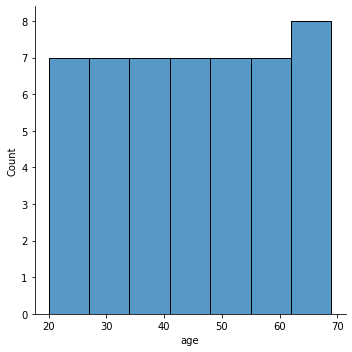

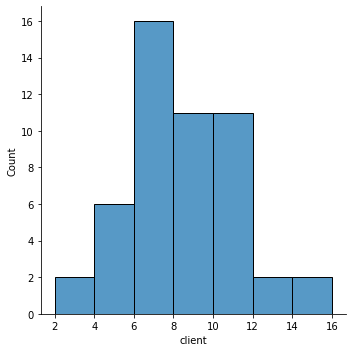

In [61]:
sns.displot(agge_p.age)
sns.displot(agge_p.client)

In [62]:
users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [80]:
u = users.groupby('age',as_index=False).agg({'premium': 'count'}).value_counts('premium',normalize=True)

In [81]:
u.head()

,age,premium
0,20,54
1,21,56
2,22,57
3,23,49
4,24,51


In [98]:
u = users.groupby('age').agg({'premium': 'count'}).value_counts('premium',normalize=True)

In [99]:
u.head()

premium
62    0.10
66    0.08
50    0.08
60    0.08
69    0.06
dtype: float64

In [100]:
logs.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,False,58.0
1,61468,True,phone,1585425658,False,55.0
2,35604,False,phone,1585459894,False,64.0
3,9961,True,phone,1585400189,False,44.0
4,10931,True,computer,1585468629,False,49.0


In [109]:
yy = logs.query('success == True').groupby('client').agg({'success':'count'})

In [110]:
yy.head()

,success
client,
40,1
50,1
75,1
81,1
132,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


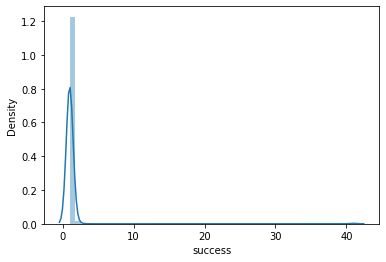

In [111]:
sns.distplot(yy.success)

In [112]:
users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [117]:
pu = users.query('premium == True').groupby('age').agg({'premium':'count'})

In [118]:
npu = users.query('premium == False').groupby('age').agg({'premium':'count'})

In [119]:
pu.head()

,premium
age,
20,9
21,7
22,7
23,7
24,5


In [121]:
pu['non_premium'] = npu.premium 

In [137]:
asd = users.query('premium==False').age

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


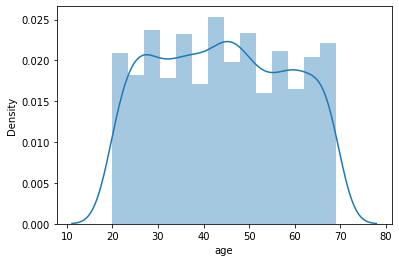

In [140]:
sns.distplot(asd, kde=True)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


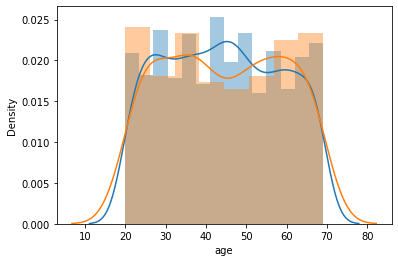

In [136]:
sns.distplot(users.query('premium==False').age)
sns.distplot(users.query('premium==True').age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


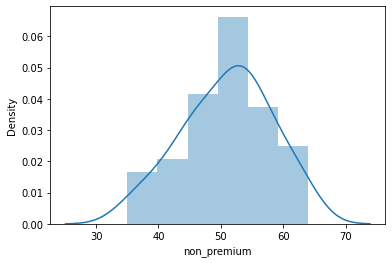

In [133]:
sns.distplot(pu.non_premium)

In [141]:
logs.head()

,client,success,platform,time,premium,age
0,40177,True,phone,1585412212,False,58.0
1,61468,True,phone,1585425658,False,55.0
2,35604,False,phone,1585459894,False,64.0
3,9961,True,phone,1585400189,False,44.0
4,10931,True,computer,1585468629,False,49.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


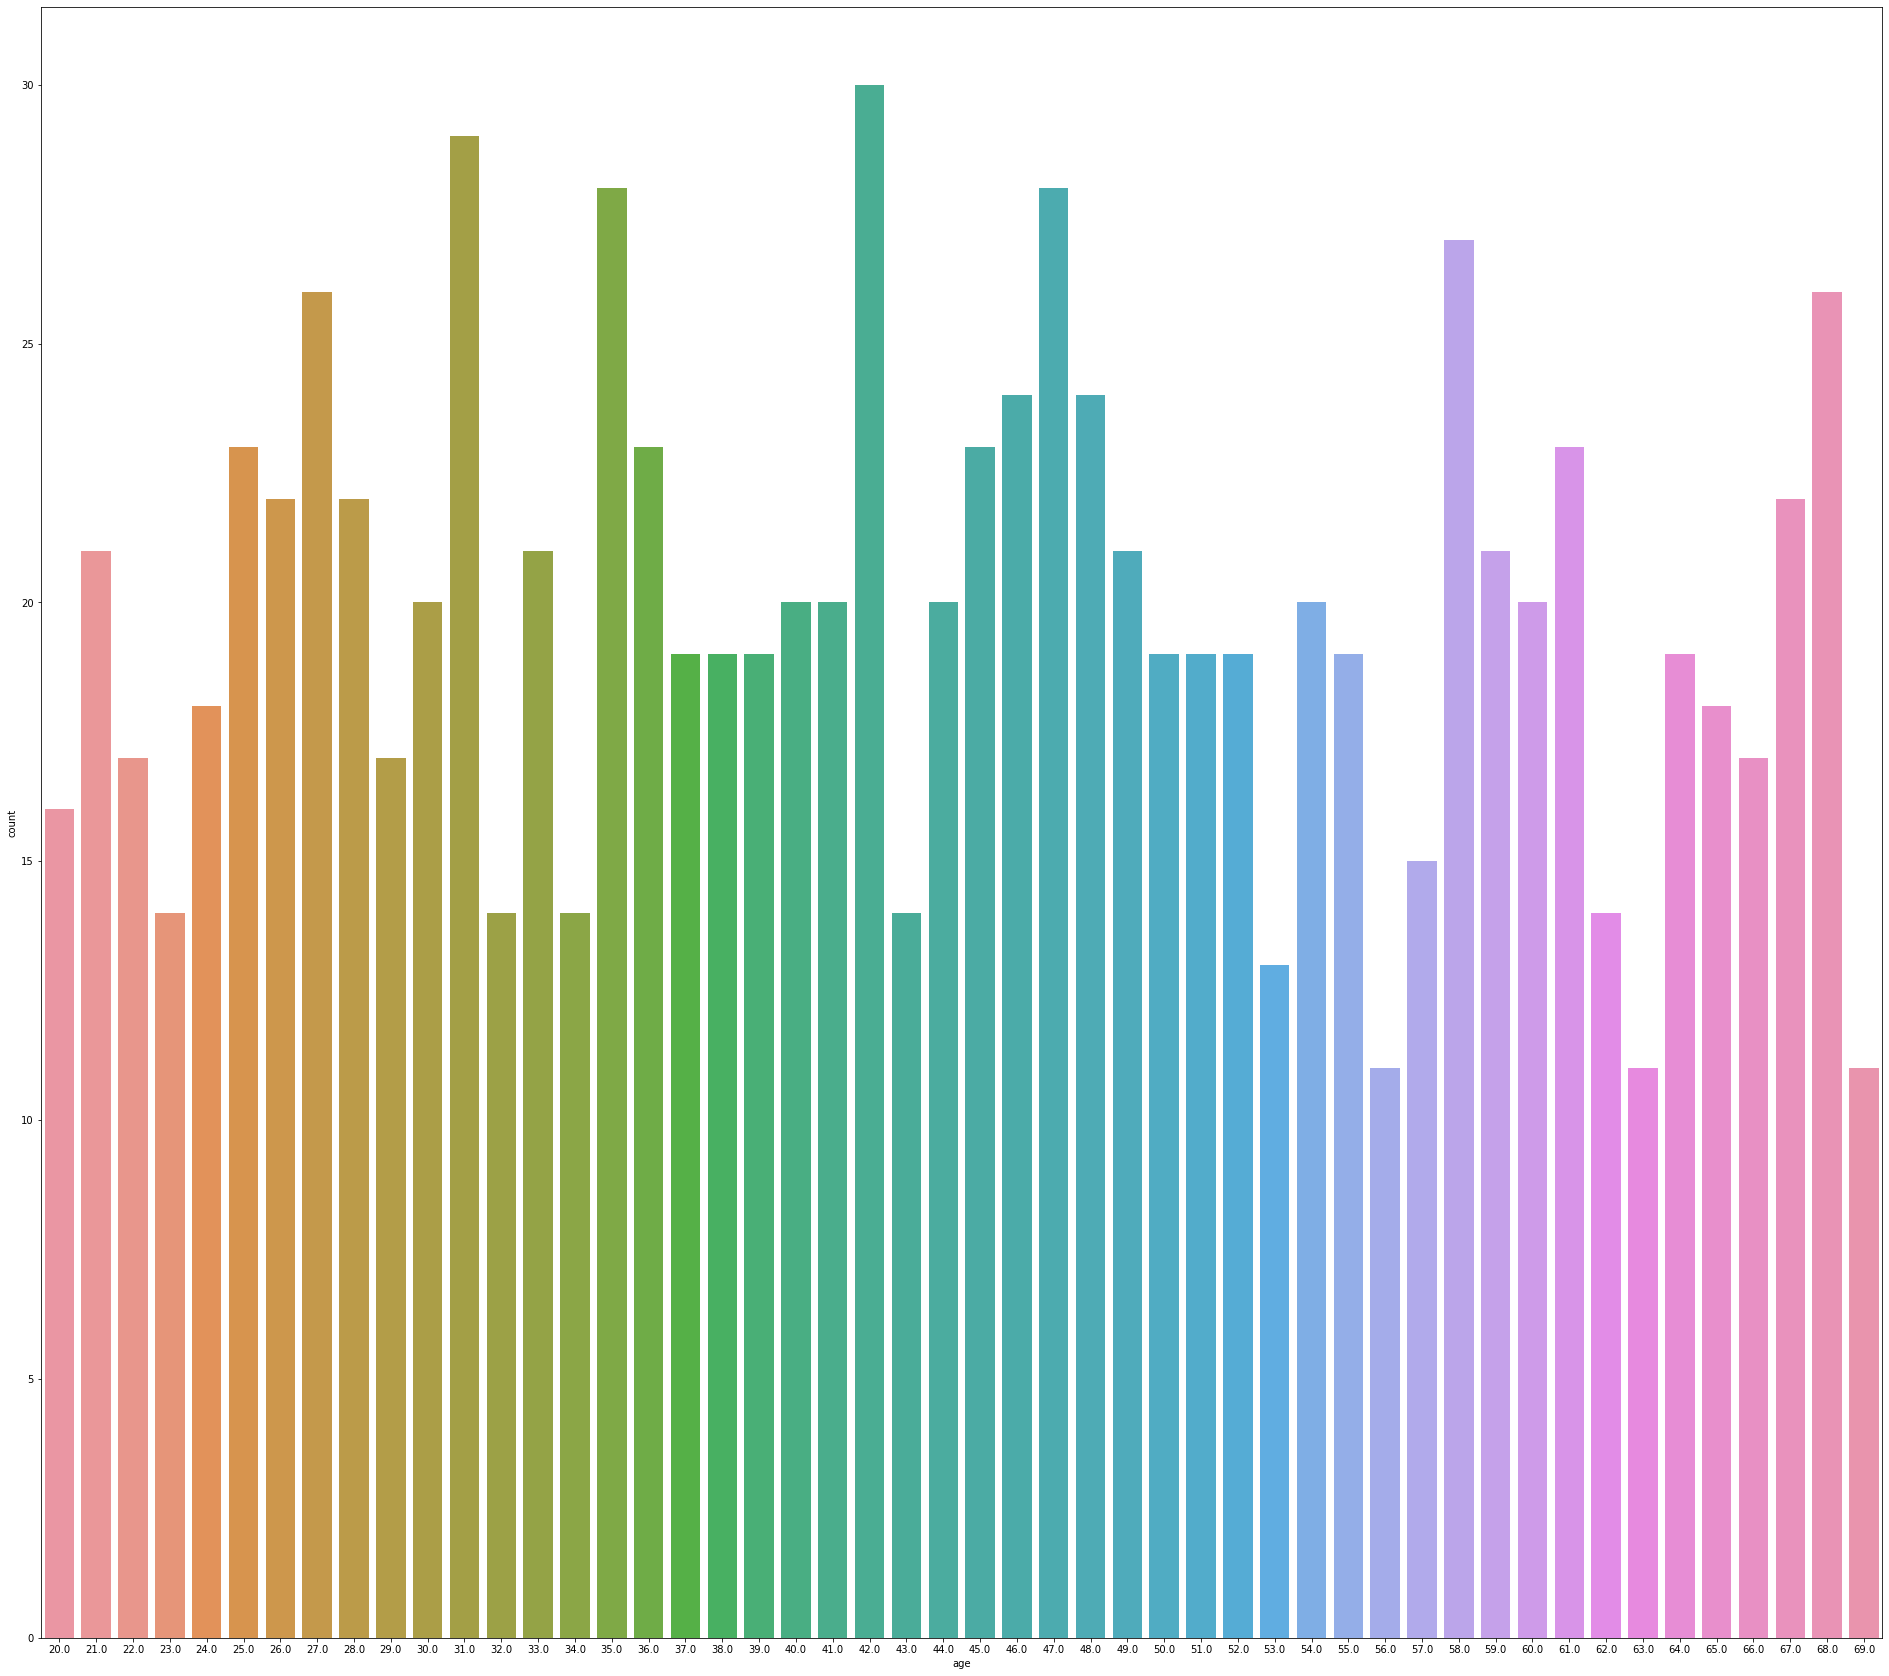

In [161]:
plt.figure(figsize=(33,30))
sns.countplot(logs.query('success == True' and 'platform == "computer"').age)

In [172]:
plt.figure(figsize=(33,30))
sns.countplot(logs.query(['success == True','platform == "computer"']).age)

ValueError: expr must be a string to be evaluated, <class 'list'> given

<Figure size 2376x2160 with 0 Axes>

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


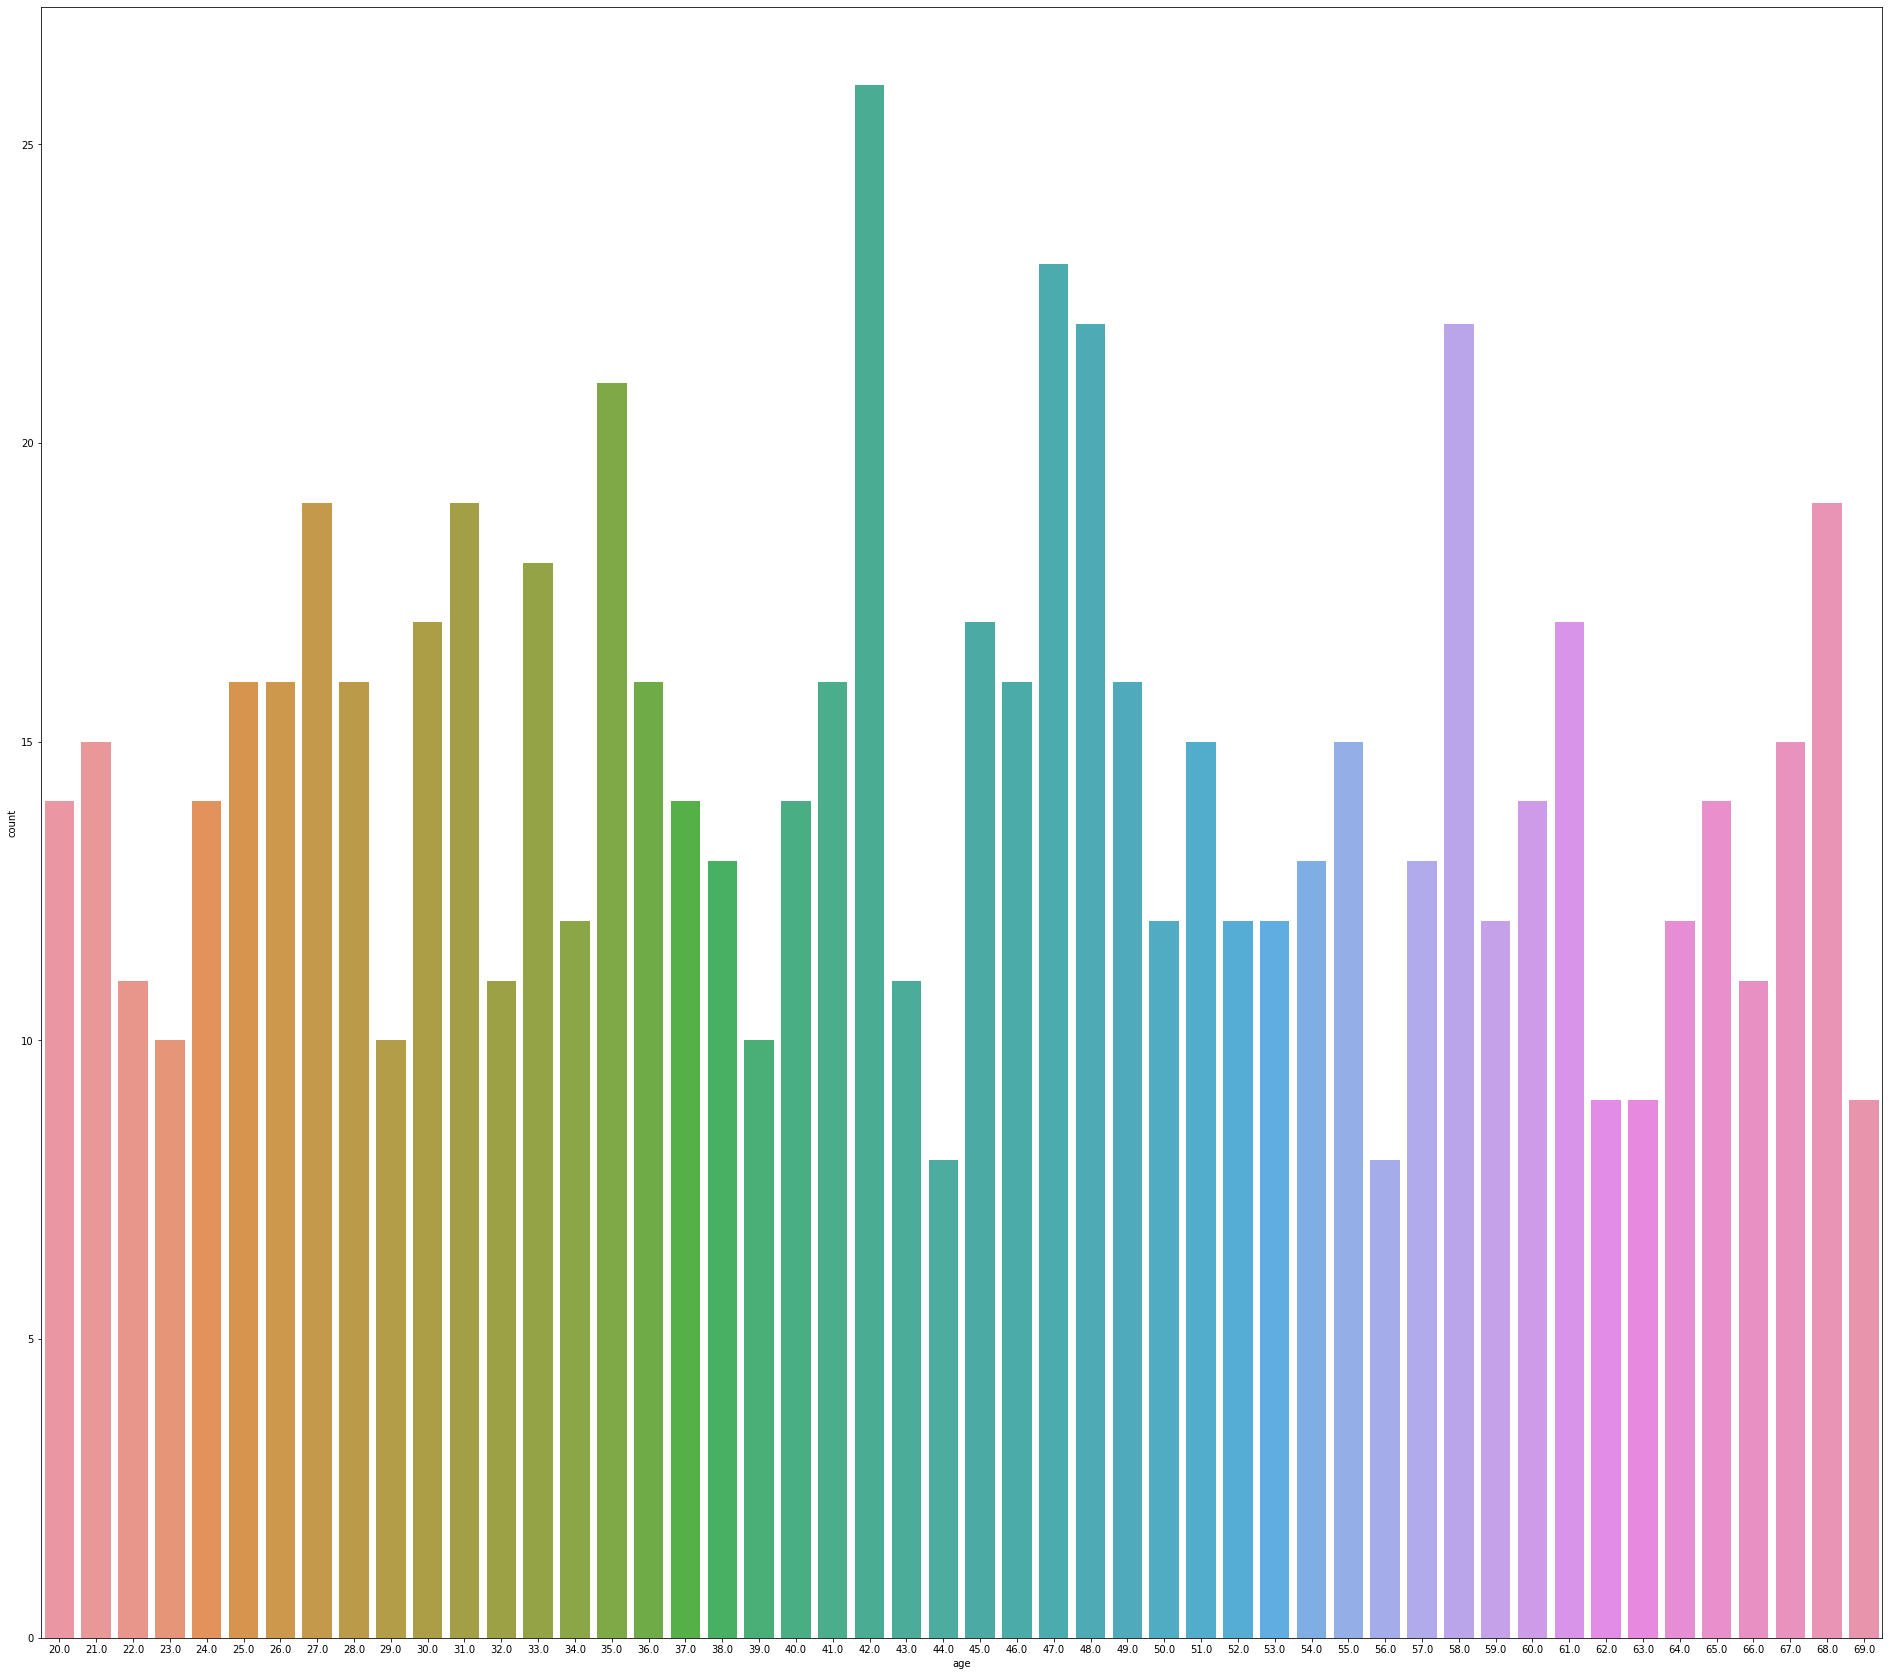

In [164]:
plt.figure(figsize=(33,30))
sns.countplot(logs.query('platform == "computer" and success == True ').age)

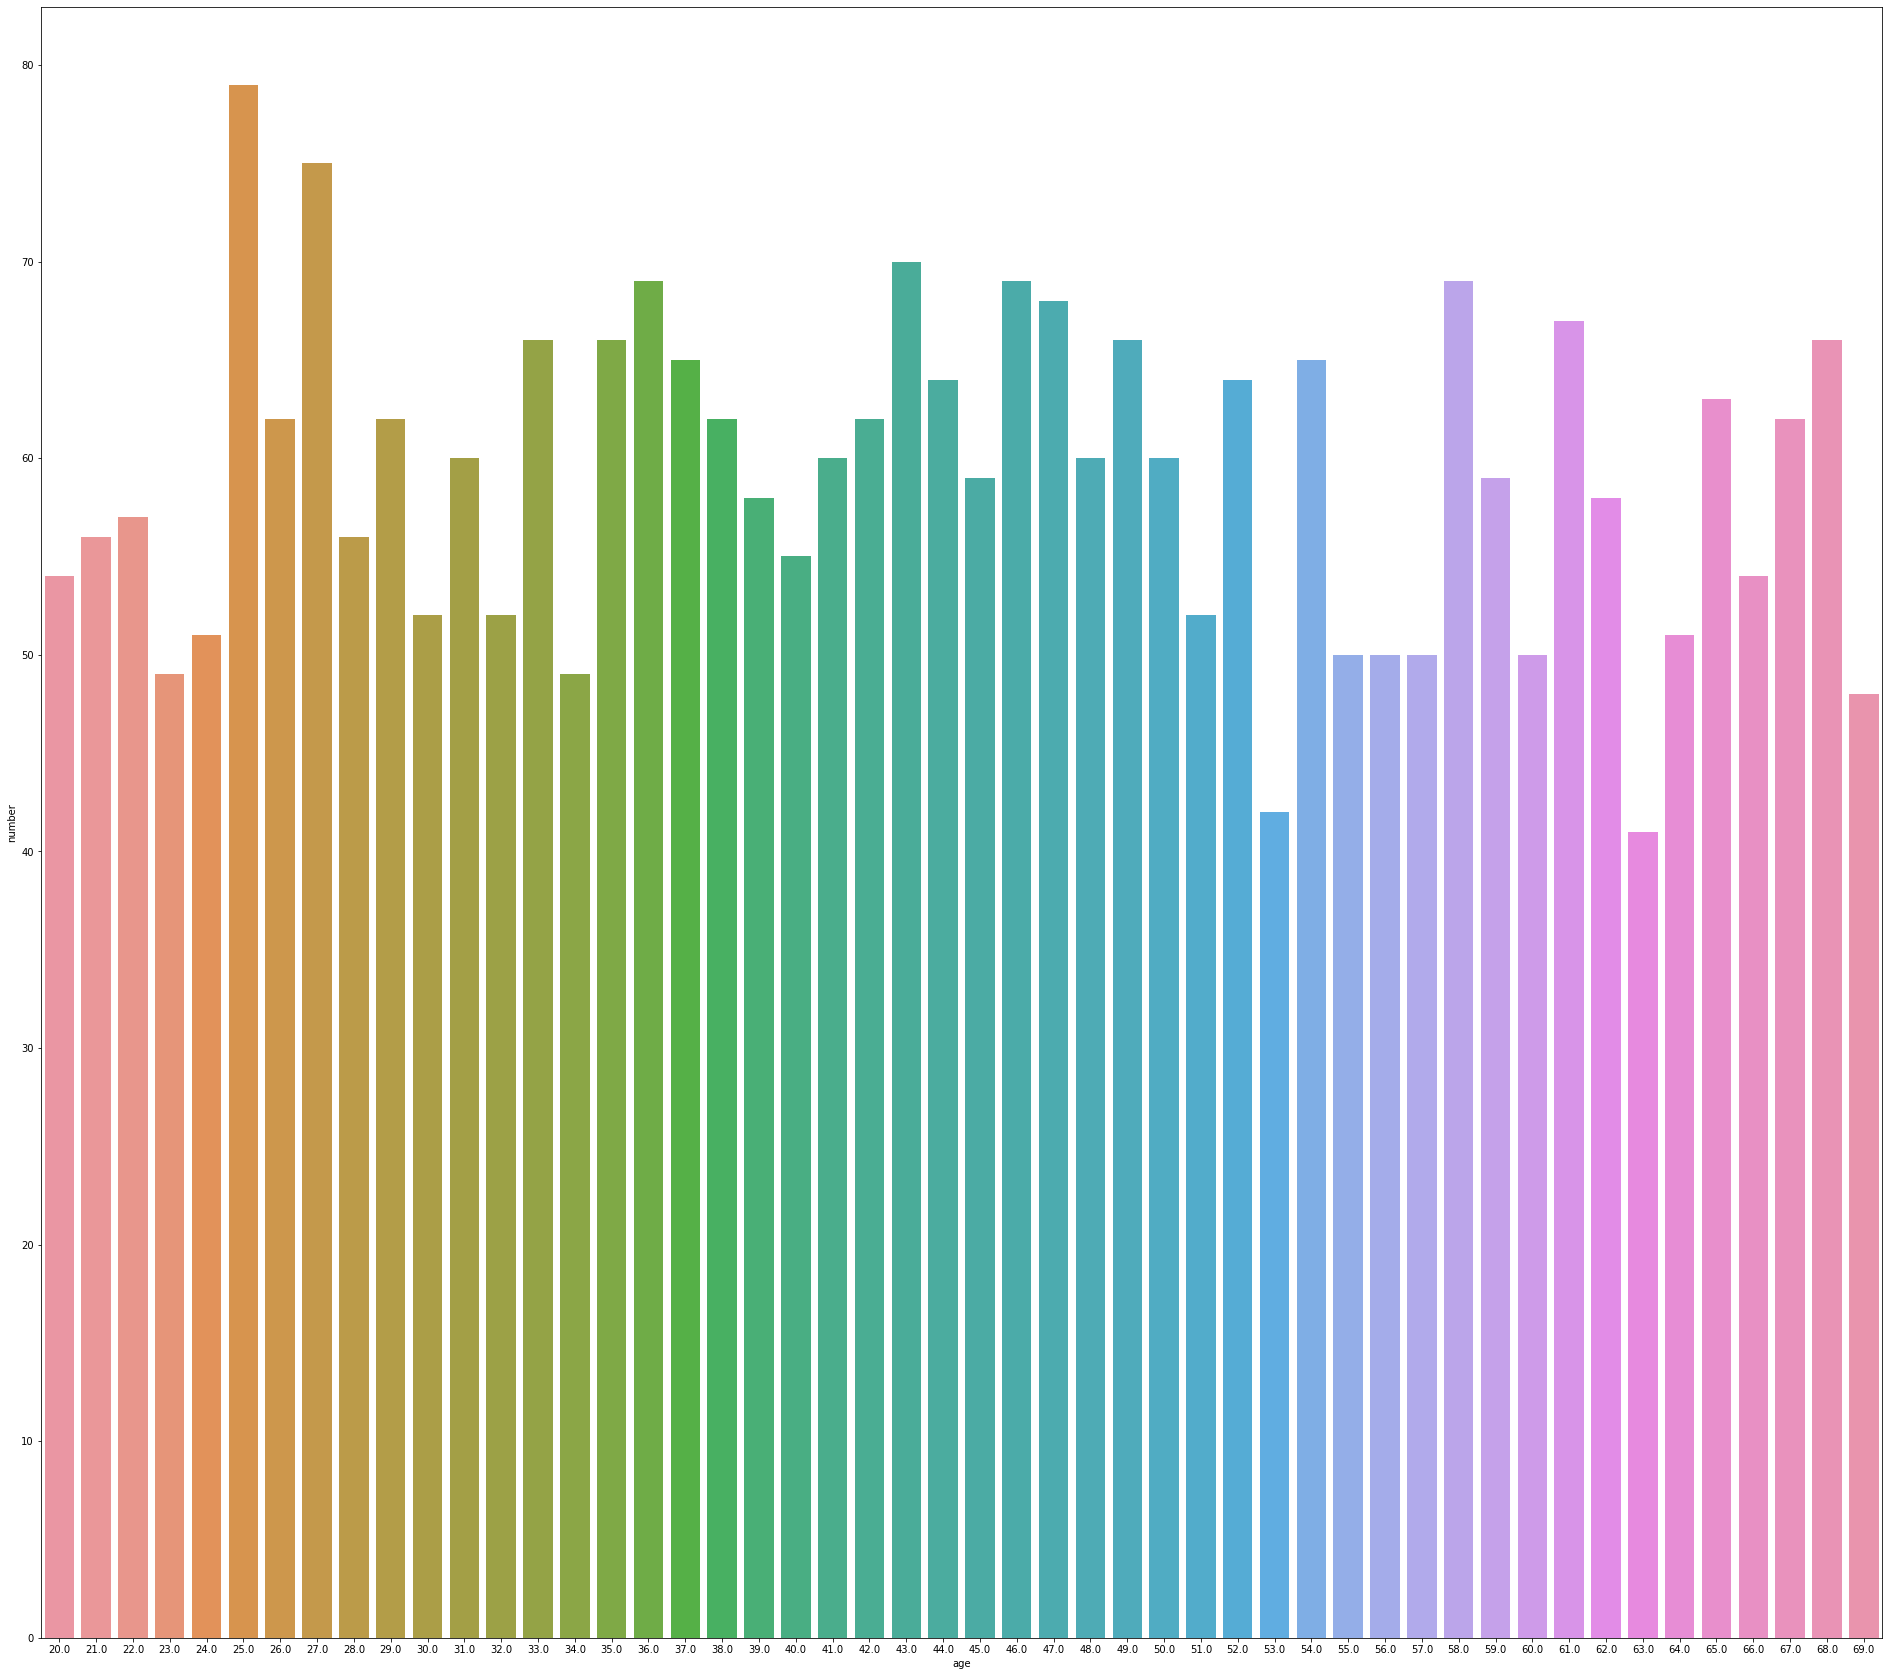

In [168]:
huhu = logs['age'].value_counts().reset_index().rename(columns={'index' : 'age', 'age':'number'})
plt.figure(figsize=(33,30))
ax = sns.barplot(x='age',y='number', data=huhu)

In [166]:
huhu

,age,number
0,25.0,79
1,27.0,75
2,43.0,70
3,58.0,69
4,46.0,69
5,36.0,69
6,47.0,68
7,61.0,67
8,68.0,66
9,49.0,66


In [169]:
huhu.max()

age       69.0
number    79.0
dtype: float64